# Loneliness and Deprivation

## Read in IMD and loneliness index data for England

In [1]:
import pandas as pd

In [4]:
imd = pd.read_csv('england/imd2015eng.csv')

In [5]:
loneliness = pd.read_csv('england/final_data.csv')

In [8]:
imd.shape

(32844, 57)

In [9]:
loneliness.shape

(6576, 35)

In [11]:
imd.columns

Index(['LSOA code (2011)', 'LSOA name (2011)',
       'Local Authority District code (2013)',
       'Local Authority District name (2013)',
       'Index of Multiple Deprivation (IMD) Score',
       'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
       'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)',
       'Income Score (rate)', 'Income Rank (where 1 is most deprived)',
       'Income Decile (where 1 is most deprived 10% of LSOAs)',
       'Employment Score (rate)', 'Employment Rank (where 1 is most deprived)',
       'Employment Decile (where 1 is most deprived 10% of LSOAs)',
       'Education, Skills and Training Score',
       'Education, Skills and Training Rank (where 1 is most deprived)',
       'Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)',
       'Health Deprivation and Disability Score',
       'Health Deprivation and Disability Rank (where 1 is most deprived)',
       'Health Dep

In [12]:
loneliness.columns

Index(['Unnamed: 0', 'pcstrip', 'Year', 'NUMBER_OF_PATIENTS', 'SHA', 'PCT',
       'oseast1m', 'osnrth1m', 'lsoa11', 'msoa11', 'ru11ind', 'rgn', 'laua',
       'imd', 'depression_perc', 'alzheimers_perc', 'blood pressure_perc',
       'hypertension_perc', 'diabeties_perc', 'cardiovascular disease_perc',
       'insomnia_perc', 'addiction_perc', 'social anxiety_perc',
       'loneliness_perc', 'depression_zscore', 'alzheimers_zscore',
       'blood pressure_zscore', 'hypertension_zscore', 'diabeties_zscore',
       'cardiovascular disease_zscore', 'insomnia_zscore', 'addiction_zscore',
       'social anxiety_zscore', 'loneliness_zscore', 'loneills'],
      dtype='object')

IMD data is a single snapshot for each LSOA. Loneliness in theory has entries for each year for each postcode but in practice is limited to a single year. Will need to produce an aggregate view for each LSOA to fuse with the IMD data

In [38]:
loneliness['Year'].unique()

array([2018])

In [39]:
agg_cols = {'loneills': 'mean'}
loneliness_per_lsoa11 = loneliness.groupby(['lsoa11', 'Year'], as_index=False).agg(agg_cols)

In [40]:
lonliness_imd = pd.merge(loneliness_per_lsoa11, imd, how='left', left_on=['lsoa11'], right_on=['LSOA code (2011)'])

In [41]:
lonliness_imd.shape

(5908, 60)

In [42]:
lonliness_imd.columns

Index(['lsoa11', 'Year', 'loneills', 'LSOA code (2011)', 'LSOA name (2011)',
       'Local Authority District code (2013)',
       'Local Authority District name (2013)',
       'Index of Multiple Deprivation (IMD) Score',
       'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
       'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)',
       'Income Score (rate)', 'Income Rank (where 1 is most deprived)',
       'Income Decile (where 1 is most deprived 10% of LSOAs)',
       'Employment Score (rate)', 'Employment Rank (where 1 is most deprived)',
       'Employment Decile (where 1 is most deprived 10% of LSOAs)',
       'Education, Skills and Training Score',
       'Education, Skills and Training Rank (where 1 is most deprived)',
       'Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)',
       'Health Deprivation and Disability Score',
       'Health Deprivation and Disability Rank (where 1 is most 

## Visualize the joined data

In [22]:
import plotly.express as px

In [44]:
lonliness_imd[['lsoa11', 'Index of Multiple Deprivation (IMD) Score', 'loneills']].describe()

,Index of Multiple Deprivation (IMD) Score,loneills
count,5908.000000,5908.000000
mean,24.619449,0.015607
std,16.604648,2.245055
min,0.578000,-12.201106
25%,11.414000,-1.062433
50%,20.680000,-0.089006
75%,34.207500,0.937458
max,86.444000,55.662804


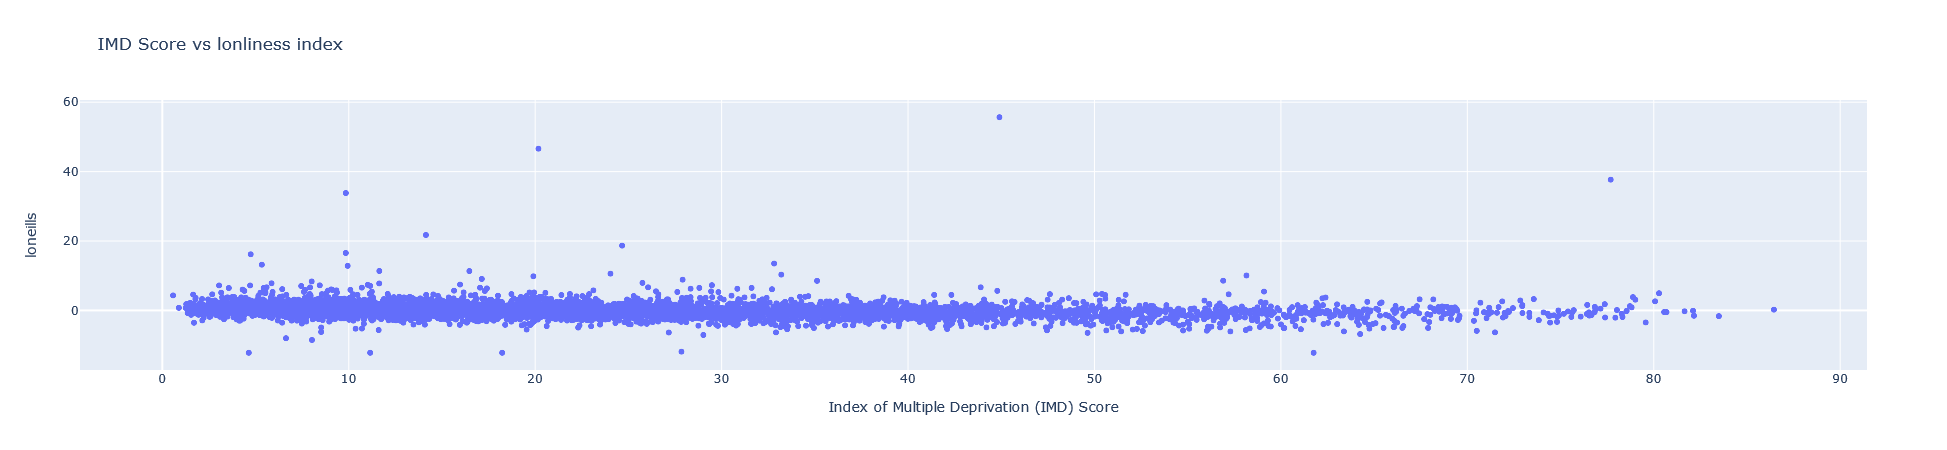

In [54]:
fig = px.scatter(lonliness_imd, y='loneills', x='Index of Multiple Deprivation (IMD) Score', title='IMD Score vs lonliness index')
fig.show()

Plotting the LSOAs on a map will need the boundary shapefiles. Try here https://geoportal.statistics.gov.uk/search?q=Lower%20Layer%20Super%20Output%20Area%20boundaries

In [56]:
import geopandas as gpd

In [58]:
lsoa_shapes = gpd.read_file('england/Lower_Layer_Super_Output_Areas__December_2011__Boundaries_Full_Extent__BFE__EW_V3-shp')